In [ ]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test,y_test) = mnist.load_data()
x_train.shape


(60000, 28, 28)

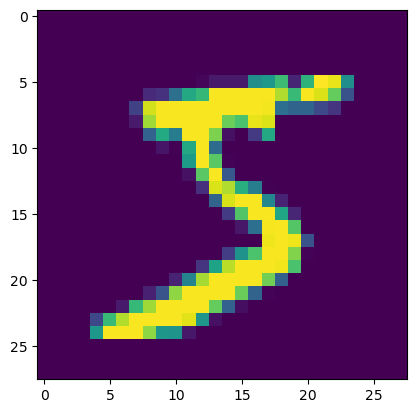

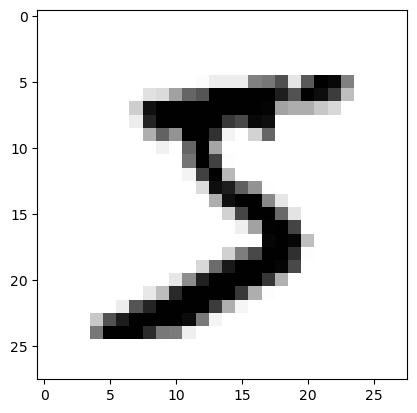

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0], cmap = plt.cm.binary) 

In [ ]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

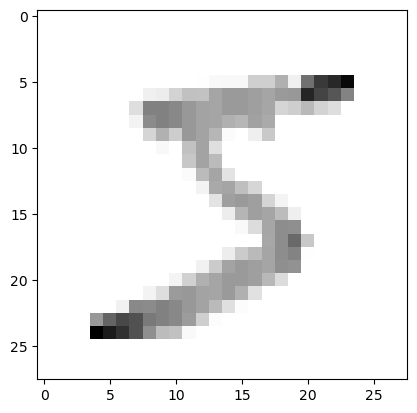

In [ ]:
x_train = tf.keras.utils.normalize(x_train ,axis = 1)
x_test = tf.keras.utils.normalize (x_test ,axis = 1)
plt.imshow(x_train[0], cmap = plt.cm.binary)

print(x_train[0])

print (y_train[0])


In [5]:
import numpy as np
IMG_SIZE = 28
x_trainr= np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1) #aa increasing one dimension for kernel filter operation
x_testr= np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1) ## increasing one dimension for kernel operation

print("Training Samples dimension",x_trainr.shape)
print("Testing Samples dimension", x_testr.shape)

Training Samples dimension (60000, 28, 28, 1)
Testing Samples dimension (10000, 28, 28, 1)


In [6]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D


In [15]:
model = Sequential()

model.add(Conv2D(64, (3,3), input_shape = x_trainr.shape[1:])) 
model.add(Activation("relu")) 
model.add(MaxPooling2D(pool_size=(2,2)))## Maxpooling single maximum value of 2x2,

#2nd Convolution Layer
model.add(Conv2D(64, (3,3))) # 2nd Convolution Layer
model.add(Activation("relu")) # activation funtion
model.add(MaxPooling2D(pool_size=(2,2))) ## ΜΑγpooling

#3rd Convolution Layer
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#### Fully Connected Layer # 1 
model.add (Flatten()) ### before using fully connected Layer, need to be flatten so that 20 to 1D
model.add (Dense(64)) 
model.add(Activation("relu"))

#### FuLLy Connected Layer # 2
model.add (Dense(32))
model.add(Activation("relu"))

#### Last Fully Connected Layer, output must be equal to number of classes, 10 (0-9)
model.add(Dense(10)) ## this last dense Layer must be equal to 10
model.add(Activation('softmax')) ### activation function is changed to Softmax (Class probabilites)


In [17]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,066 (316.66 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
print("Total training samples = ", len(x_trainr))


Total training samples =  60000


In [21]:
 model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics=['accuracy'])

In [ ]:
model.fit(x_trainr,y_train, epochs=5, validation_split = 0.3) ## Training my model


Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.9971 - loss: 0.0107 - val_accuracy: 0.9848 - val_loss: 0.0795
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.9987 - loss: 0.0041 - val_accuracy: 0.9837 - val_loss: 0.0909
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.9982 - loss: 0.0057 - val_accuracy: 0.9842 - val_loss: 0.0854
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.9979 - loss: 0.0055 - val_accuracy: 0.9842 - val_loss: 0.0827
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.9968 - loss: 0.0100 - val_accuracy: 0.9860 - val_loss: 0.0774


In [ ]:

test_loss, test_acc = model.evaluate(x_testr, y_test)
print("test loss on 10,000 test samples", test_loss) 
print("Validation accuracy on 1,000 test sample", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9842 - loss: 0.1061
test loss on 10,000 test samples 0.08567541837692261
Validation accuracy on 1,000 test sample 0.9873999953269958


In [274]:
 predicions = model.predict([x_testr]) 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [276]:
 print (predicions)

[[4.4863700e-18 1.6952726e-15 2.0837241e-13 ... 1.0000000e+00
  4.8450101e-23 6.7324597e-15]
 [1.6410253e-11 2.0854503e-12 9.9999988e-01 ... 5.5759227e-08
  2.6240395e-13 1.9768973e-10]
 [3.9411417e-17 1.0000000e+00 5.0848502e-13 ... 7.7583169e-11
  1.5819049e-11 1.8540315e-16]
 ...
 [8.7448682e-18 2.3853906e-13 5.2307033e-21 ... 7.0658424e-16
  8.0434181e-15 3.8993273e-18]
 [1.5870182e-15 1.4090318e-16 1.2660906e-18 ... 3.2371835e-19
  1.4541629e-10 3.6920208e-14]
 [3.1232880e-10 1.2927050e-15 3.0266510e-14 ... 6.5811220e-22
  3.1432029e-12 6.1514812e-14]]


In [278]:
print (np.argmax (predicions [0])) 

7


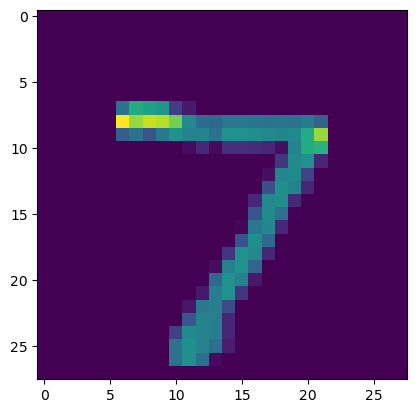

In [280]:
plt.imshow(x_test[0])

In [282]:
print(np.argmax(predicions[128]))

8


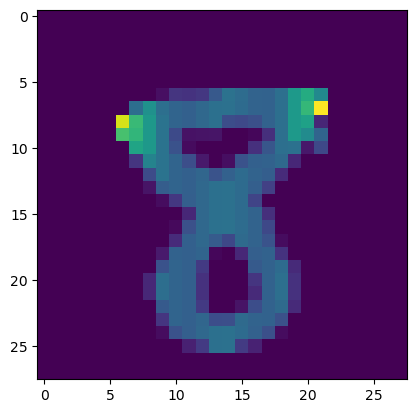

In [284]:
plt.imshow(x_test[128])

In [286]:
import cv2 

In [288]:
img = cv2.imread('seven.png')

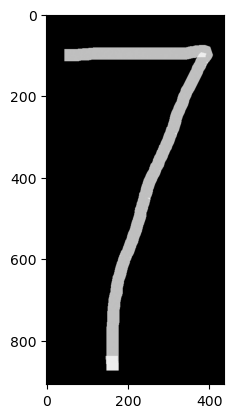

In [292]:
plt.imshow(img)

In [294]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(908, 436)

In [296]:
resized = cv2.resize(gray,(28,28), interpolation = cv2.INTER_AREA)
resized.shape

(28, 28)

In [298]:
#newimg = tf.kera.utils
newimg = tf.keras.utils.normalize(resized, axis=1) 
newimg = np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE, 1) 

newimg.shape 
#predicion = model. Predict (rewing)

(1, 28, 28, 1)

In [ ]:
predicion = model.predict(newimg)
print(np.argmax(predicions))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
7
